In [7]:
# -*- coding: utf-8 -*-
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Question 1

In [2]:
n = 500

np.random.seed(6996)

Epsilon_vector = np.random.randn(n).reshape(n,1)

X_matrix = np.matrix(np.sqrt(2) * np.random.randn(n,n))

slopesSet_vector = np.random.uniform(1, 5, size=n).reshape(n,1)

Y = 1 + X_matrix[:,0:2] * slopesSet_vector[0:2] + Epsilon_vector

for i in range(3,n+1):
    y = 1 + X_matrix[:,0:i] * slopesSet_vector[0:i] + Epsilon_vector
    Y = np.concatenate((Y,y),axis=1)

In [3]:
Y.shape

(500, 499)

# Question 2

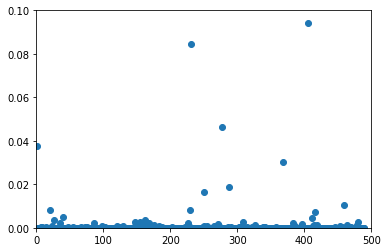

In [4]:
X_test=X_matrix[ :, 0 : 490]
y_test=Y[ : , 488]


X2 = sm.add_constant(X_test)
est = sm.OLS(y_test, X2).fit()


plt.figure()
plt.plot(range(1,491),est.pvalues[1:491],'o')
plt.ylim(0,0.1)
plt.xlim(0,500)
plt.show()

# Question 3

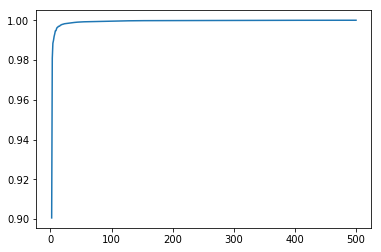

In [5]:
R2 = []

for j in range(2,501):
    X_test=X_matrix[:,0:j]
    y_test=Y[:,j-2]

    regr = linear_model.LinearRegression()

    regr.fit(X_test, y_test)

    y_pred = regr.predict(X_test)

    R2.append(r2_score(y_test, y_pred))

plt.plot(range(2,501),R2)

# Question 4

D:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


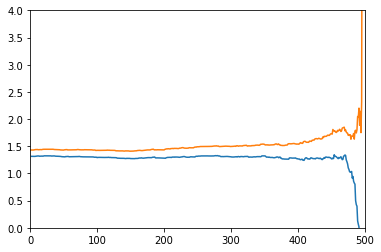

In [6]:
lower_bound = []
upper_bound = []

for p in range(2,501):
    
    X_test=X_matrix[:,0:p]
    y_test=Y[:,p-2]
    
    temp_X = sm.add_constant(X_test)
    est = sm.OLS(y_test, temp_X).fit()
    
    lower_bound.append(est.conf_int(0.05)[1][0])
    upper_bound.append(est.conf_int(0.05)[1][1])  



plt.plot(range(2,501),lower_bound,upper_bound)
plt.ylim(0,4)
plt.xlim(0,500)
plt.show()